In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import pickle
import warnings
warnings.filterwarnings("ignore")
df_1 = pd.read_csv("massgap.csv")
df_1['mc_rec'] = (df_1.rec_m1 * df_1.rec_m2)**(3./5.)/(df_1.rec_m1 + df_1.rec_m2)**(1./5.)
df_1['mtot_rec'] = df_1.rec_m1 + df_1.rec_m2 
#df_1 = df_1.loc[df_1['cfar'] < 3.86e-7]
#df_1 = df_1.sample(frac=0.80, random_state=300)
#print(df_1.head())
df_1 


inj_mass2_source_frame  inj_mass1_source_frame     id    inj_m1  \
0                    4.000000                1.400000      0  1.528040   
1                    4.000002                4.000002      1  4.575242   
2                    4.000001                1.400000      2  1.466087   
3                    9.999996                3.999998      3  4.500846   
4                    4.000002                4.000002      4  4.342598   
...                       ...                     ...    ...       ...   
98496                4.000001                1.400000  98496  1.455138   
98497               10.000002                4.000001  98497  4.568901   
98498                4.000000                1.400000  98498  1.481771   
98499                9.999998                3.999999  98499  4.572275   
98500               58.850816                3.432112  98500  3.672820   

          inj_m2  inj_spin1z  inj_spin2z  inj_redshift    rec_m1    rec_m2  \
0       4.365828    0.001434    0.014825      0.091457  2.311940  1.062312   
1       4.575242   -0.020556    0.725429      0.143810  2.425133  1.019706   
2       4.188821    0.012452   -0.609626      0.047205  1.779602  1.337138   
3      11.252116    0.411550   -0.063768      0.125212  2.122129  1.142648   
4       4.342598    0.160834    0.082396      0.085649  1.986144  1.217751   
...          ...         ...         ...           ...       ...       ...   
98496   4.157537   -0.008035   -0.222711      0.039384  2.757943  1.046706   
98497  11.422252   -0.086286    0.457130      0.142225  2.220529  1.261773   
98498   4.233632   -0.008246    0.087190      0.058408  2.106763  1.336388   
98499  11.430688   -0.232008    0.796440      0.143069  2.828965  1.030645   
98500  62.978259   -0.108964   -0.370352      0.070134  2.092325  1.325462   

       rec_spin1z  rec_spin2z  Gamma1      cfar       snr       gpstime  \
0        0.536159   -0.027597      66  0.044201  7.346325  1.172373e+09   
1        0.564391   -0.020612      66  0.048347  6.745121  1.172373e+09   
2       -0.015757   -0.032880      66  0.072839  7.065366  1.172681e+09   
3        0.698191    0.029171      66  0.072839  7.506081  1.172688e+09   
4       -0.013020   -0.006144      66  0.072839  6.989334  1.172923e+09   
...           ...         ...     ...       ...       ...           ...   
98496    0.103859   -0.020145      99  0.069165  7.023649  1.184051e+09   
98497    0.890226   -0.004763      99  0.069165  7.491696  1.184057e+09   
98498    0.244932    0.020216     100  0.069165  6.964787  1.182961e+09   
98499    0.299655   -0.039496     100  0.055267  7.389288  1.183037e+09   
98500   -0.675228    0.029167     100  0.042562  7.506388  1.183204e+09   

         mc_rec  mtot_rec  
0      1.344317  3.374252  
1      1.344289  3.444839  
2      1.340168  3.116740  
3      1.342888  3.264777  
4      1.345879  3.203895  
...         ...       ...  
98496  1.446049  3.804649  
98497  1.445737  3.482302  
98498  1.453241  3.443151  
98499  1.450552  3.859610  
98500  1.442278  3.417787  

[98501 rows x 18 columns]

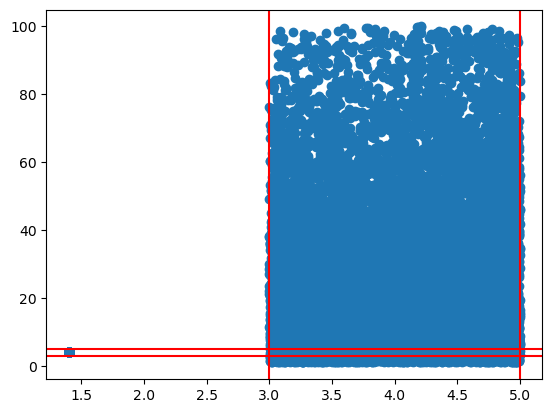

In [2]:
plt.scatter(df_1['inj_mass1_source_frame'], df_1['inj_mass2_source_frame'])
#plt.ylim((0,5))
plt.axhline(y = 3.0, c = 'r')
plt.axhline(y = 5.0, c = 'r')
plt.axvline(x = 3.0, c = 'r')
plt.axvline(x = 5.0, c = 'r')
plt.show()

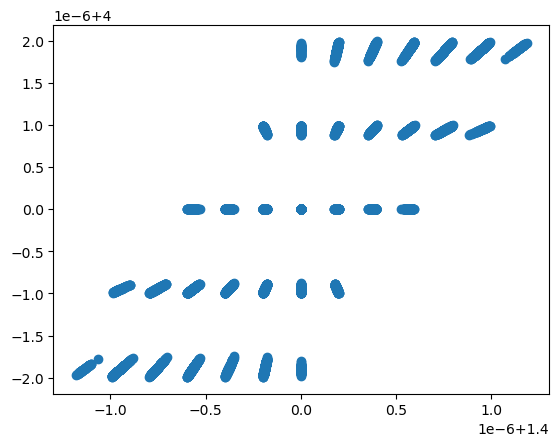

In [3]:
df_new = df_1.loc[((df_1['inj_mass1_source_frame'] < 1.6) & (df_1['inj_mass2_source_frame'] < 4.1)) ]
df_new.describe()
plt.scatter(df_new['inj_mass1_source_frame'], df_new['inj_mass2_source_frame'])


In [4]:
df_new.inj_redshift.max()

0.147501

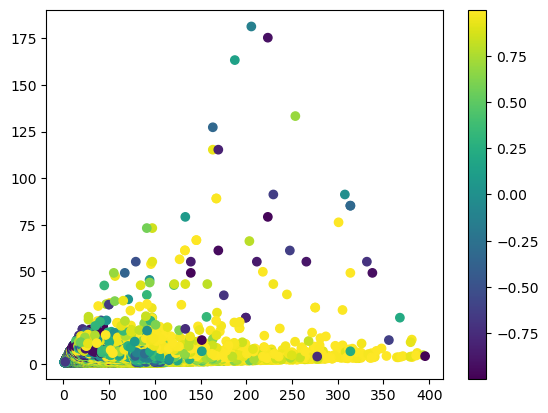

In [5]:
im = plt.scatter(df_1['rec_m1'], df_1['rec_m2'], c = df_1['rec_spin1z'])
plt.colorbar(im)


In [6]:
df_massgap = df_1.loc[df_1['cfar'] < 3.86e-7]

In [7]:
df_2 = pd.read_csv("no_massgap.csv")
df_2['mc_rec'] = (df_2.rec_m1 * df_2.rec_m2)**(3./5.)/(df_2.rec_m1 + df_2.rec_m2)**(1./5.)
df_2['mtot_rec'] = df_2.rec_m1 + df_2.rec_m2 
df_nomassgap = df_2.loc[df_2['cfar'] < 3.86e-7]

df_nomassgap.describe()

inj_mass2_source_frame  inj_mass1_source_frame             id  \
count           203414.000000           203414.000000  203414.000000   
mean                17.774400                8.559646  305565.085771   
std                 15.705907               12.984805  173322.609058   
min                  0.800100                0.800130    1174.000000   
25%                  5.000000                1.400000  155058.250000   
50%                 10.000004                1.400001  309881.500000   
75%                 29.999996               10.072659  453167.750000   
max                 99.986827               49.998659  602167.000000   

              inj_m1         inj_m2     inj_spin1z     inj_spin2z  \
count  203414.000000  203414.000000  203414.000000  203414.000000   
mean       10.339836      20.074622       0.027177       0.113142   
std        16.501504      18.411684       0.288371       0.461420   
min         0.806347       0.806887      -0.989799      -0.989963   
25%         1.445985       5.199105      -0.030146      -0.131403   
50%         1.494439      10.714564       0.001307       0.041488   
75%        11.310696      31.538987       0.041237       0.454795   
max        83.205907     118.848530       0.990000       0.989978   

        inj_redshift         rec_m1         rec_m2     rec_spin1z  \
count  203414.000000  203414.000000  203414.000000  203414.000000   
mean        0.090052      24.312151       6.219457       0.122874   
std         0.100677      22.832602       8.954305       0.524291   
min         0.000107       1.005567       1.000001      -0.998992   
25%         0.030127       5.352780       1.231580      -0.162407   
50%         0.050104      16.518375       1.692135       0.133563   
75%         0.102896      39.995667       6.376857       0.535836   
max         0.699810     381.369900      67.166664       0.998999   

          rec_spin2z         Gamma1           cfar            snr  \
count  203414.000000  203414.000000   2.034140e+05  203414.000000   
mean       -0.048337     441.967957   1.739739e-08      13.671656   
std         0.386968     197.751959   5.675219e-08       7.664049   
min        -0.999000       0.000000  8.327518e-158       8.161300   
25%        -0.047268     310.000000   7.594037e-26      10.189263   
50%        -0.002382     539.000000   3.873721e-16      11.512973   
75%         0.038867     623.000000   4.079686e-10      14.323162   
max         0.998962     682.000000   3.859883e-07     922.666136   

            gpstime         mc_rec       mtot_rec  
count  2.034140e+05  203414.000000  203414.000000  
mean   1.175371e+09       8.892989      30.531608  
std    5.435467e+06      10.048341      28.349197  
min    1.164601e+09       0.873576       2.006956  
25%    1.171347e+09       2.307510       7.209741  
50%    1.174633e+09       4.744117      18.556739  
75%    1.181134e+09      11.484378      50.663742  
max    1.185212e+09      67.985981     385.704012

In [8]:
drop_mask = ((df_nomassgap['inj_mass1_source_frame'] > 3.0) & (df_nomassgap['inj_mass1_source_frame'] < 5.0)) | \
            ((df_nomassgap['inj_mass2_source_frame'] > 3.0) & (df_nomassgap['inj_mass2_source_frame'] < 5.0))

In [9]:
df_nomassgap = df_nomassgap.loc[~drop_mask]
df_nomassgap = df_nomassgap.sample(frac=1 ,replace=False)


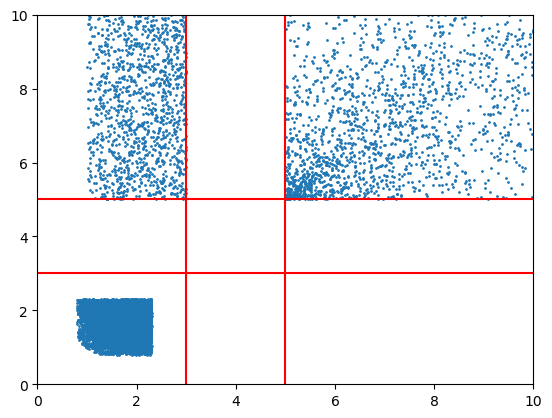

In [10]:
plt.scatter(df_nomassgap['inj_mass1_source_frame'], df_nomassgap['inj_mass2_source_frame'], s=1)
plt.axhline(y = 3.0, c = 'r')
plt.axhline(y = 5.0, c = 'r')
plt.axvline(x = 3.0, c = 'r')
plt.axvline(x = 5.0, c = 'r')
plt.xlim((0,10))
plt.ylim((0,10))
plt.show()

In [11]:
df_nomassgap['has_massgap'] = 0.0 

In [12]:
df_nomassgap.describe()

inj_mass2_source_frame  inj_mass1_source_frame             id  \
count            75748.000000            75748.000000   75748.000000   
mean                18.718964                9.082840  304867.852128   
std                 16.014050               13.321939  174958.398815   
min                  0.800100                0.800130    1210.000000   
25%                  5.000002                1.400000  152877.250000   
50%                 11.542840                1.400001  306374.000000   
75%                 30.000000               12.381641  457879.750000   
max                 99.972644               49.998659  602165.000000   

             inj_m1        inj_m2    inj_spin1z    inj_spin2z  inj_redshift  \
count  75748.000000  75748.000000  75748.000000  75748.000000  75748.000000   
mean      10.987837     21.172056      0.027793      0.120111      0.093773   
std       16.934715     18.747887      0.298518      0.460443      0.102997   
min        0.807141      0.807430     -0.989649     -0.989922      0.001052   
25%        1.447920      5.271371     -0.032573     -0.123346      0.030652   
50%        1.509186     12.908812      0.001450      0.043252      0.052276   
75%       14.101697     31.765250      0.045190      0.465392      0.111074   
max       82.735654    116.907090      0.990000      0.989978      0.699810   

             rec_m1        rec_m2    rec_spin1z    rec_spin2z        Gamma1  \
count  75748.000000  75748.000000  75748.000000  75748.000000  75748.000000   
mean      25.677572      6.560432      0.126149     -0.048758    451.200916   
std       23.172741      9.175572      0.526700      0.398078    201.581214   
min        1.005723      1.000008     -0.998969     -0.999000      0.000000   
25%        5.950550      1.240498     -0.147903     -0.049007    315.000000   
50%       18.571675      1.739282      0.133563     -0.002168    547.000000   
75%       41.762959      7.990969      0.544168      0.039872    624.000000   
max      381.369900     67.166664      0.998999      0.998962    682.000000   

                cfar           snr       gpstime        mc_rec      mtot_rec  \
count   7.574800e+04  75748.000000  7.574800e+04  75748.000000  75748.000000   
mean    1.766726e-08     13.676800  1.175357e+09      9.370736     32.238004   
std     5.720085e-08      7.269626  5.417090e+06     10.250482     28.720331   
min    5.236674e-150      8.161300  1.164601e+09      0.873576      2.006956   
25%     7.409878e-26     10.188807  1.171346e+09      2.338530      7.787703   
50%     4.334591e-16     11.513448  1.174623e+09      4.883159     22.198554   
75%     4.542314e-10     14.347122  1.181117e+09     13.467278     53.882543   
max     3.859883e-07    260.810839  1.185212e+09     67.985981    385.704012   

       has_massgap  
count      75748.0  
mean           0.0  
std            0.0  
min            0.0  
25%            0.0  
50%            0.0  
75%            0.0  
max            0.0

In [13]:
df_massgap['has_massgap'] = 1.0

In [14]:
 def run_tests_rf(features, targets,
                  num_runs=10,
                  test_size=0.1,
                  n_estimators=70,
                  criterion='gini',
                  max_features='sqrt',
                  max_depth=20,
                  n_jobs=-1,
                  verbose=True):
    '''
    Split the feature set into test and training, train
    and run classifier
    
    Parameters
    ----------
    features : numpy.ndarray
        Feature set, can be array or Dataframe
    targets : numpy.ndarray
        Binary target set, 0 or 1 values
    num_runs : int
        Number of test runs to be performed
    test_size : float
        Fraction of the feature set to be used for testing
    **kwargs
        Keyword arguments for classification algorithm
    '''
    avg = []
    for ii in range(num_runs):
        X_train, X_test, y_train, y_test = train_test_split(features, targets,
                                                            test_size=test_size,
                                                            random_state=np.random.randint(0,200))
        clf = RandomForestClassifier(n_estimators=n_estimators,
                                     criterion=criterion,
                                     max_features=max_features,
                                     max_depth=max_depth,
                                     n_jobs=n_jobs)
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        
        incorrect = np.logical_xor(predictions, y_test)
        correct = np.logical_not(incorrect)
        incorrect = np.sum(incorrect)
        correct = np.sum(correct)
        percentage_correct = 100.*(correct)/(correct+incorrect)
        percentage_incorrect = 100.*incorrect/(correct+incorrect)
        avg.append(percentage_incorrect)
        if verbose:
            print(
                "Correct predictions {}, incorrect predictions {}, correct {}%, incorrect {}%".format(
                    correct,
                    incorrect,
                    percentage_correct,
                    percentage_incorrect))
    with open("rf_balanced.pickle", 'wb') as f:
        pickle.dump(clf, f)
    print(X_test)
    print(y_test)

    print("\nAverage Incorrectness: {}".format(np.mean(avg)))

In [15]:
def run_RF_classifier(X_train, y_train,
                       X_test,
                       **kwargs):
    clf = RandomForestClassifier(**kwargs)
    clf.fit(X_train, y_train)
    predictions_proba = clf.predict_proba(X_test)
    predict = clf.predict(X_test)
    return predictions_proba, predict


In [16]:
def run_k_fold_split(features, targets, n_splits=10, random_state=0,
                     **kwargs):

    res_predict_proba = np.empty(len(features))
    res_predict = np.empty(len(features))
    res_predict_proba[:] = np.nan
    res_predict[:] = np.nan

    sss = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    sss.get_n_splits(features, targets)
    for train_index, test_index in sss.split(features, targets):
        X_train, X_test, y_train = \
            features.iloc[train_index], \
            features.iloc[test_index], \
            targets.iloc[train_index]

        predict_proba, predict = run_RF_classifier(X_train, y_train, X_test,
                                                    **kwargs)
        predict_proba = predict_proba.T[1]

        res_predict_proba[test_index] = predict_proba
        res_predict[test_index] = predict
    return res_predict, res_predict_proba


In [17]:

combined_df = pd.concat([df_massgap,df_nomassgap], ignore_index=True)
feature_cols = ["rec_m1", "rec_m2", "rec_spin1z","rec_spin2z","mc_rec","mtot_rec", "snr"]
category_cols = ["has_massgap"]
features = combined_df.loc[:,feature_cols]
category = combined_df.has_massgap



In [18]:
num_runs = 10
test_size = 0.05
n_estimators = 50
max_depth = 50
max_features


In [19]:
run_tests_rf(features, category, num_runs=num_runs, test_size=test_size, n_estimators=n_estimators, max_depth=max_depth)

Correct predictions 5384, incorrect predictions 298, correct 94.7553678282295%, incorrect 5.244632171770504%
Correct predictions 5421, incorrect predictions 261, correct 95.40654699049631%, incorrect 4.593453009503696%
Correct predictions 5376, incorrect predictions 306, correct 94.61457233368532%, incorrect 5.385427666314678%
Correct predictions 5381, incorrect predictions 301, correct 94.70256951777543%, incorrect 5.297430482224569%
Correct predictions 5380, incorrect predictions 302, correct 94.68497008095741%, incorrect 5.3150299190425905%
Correct predictions 5379, incorrect predictions 303, correct 94.66737064413938%, incorrect 5.332629355860613%
Correct predictions 5380, incorrect predictions 302, correct 94.68497008095741%, incorrect 5.3150299190425905%
Correct predictions 5388, incorrect predictions 294, correct 94.82576557550158%, incorrect 5.174234424498416%
Correct predictions 5397, incorrect predictions 285, correct 94.98416050686377%, incorrect 5.01583949313622%
Correct pr

In [20]:
res_predict_rf, res_predict_proba_rf = run_k_fold_split(features, category, n_estimators=n_estimators, max_depth=max_depth)

In [21]:
combined_df['rf_prob'] = res_predict_proba_rf

In [22]:
 def ROC_curve(df, method):
    conf_matrix = pd.DataFrame(columns=['TN','FN','FP','TP'])
    for i in np.arange(0.00,1.01,0.01): 
        df[method+"_threshold"] = np.where(df[method+"_"+"prob"]>= i, 1.0, df[method+"_"+"prob"])
        df[method+"_threshold"] = np.where(df[method+"_threshold"]!=1.0, 0.0, df[method+"_threshold"])
        FOMs = {0+0j:'TN', 1+0j:'FN',0+1j:'FP',1+1j:'TP'}
        winner_complex = df["has_massgap"] + 1j * df[method+"_threshold"]
        df["classified"] = winner_complex
        FOM_map = map (lambda x: FOMs[x], winner_complex) 
        df["classified"] = list(FOM_map)
        conf_matrix= conf_matrix.append(df["classified"].value_counts())
    conf_matrix = conf_matrix.reset_index(drop=True)
    conf_matrix = conf_matrix.fillna(0).astype(int)   
    conf_matrix['TPR'] = conf_matrix['TP']/(conf_matrix['TP']+conf_matrix['FN'])
    conf_matrix['TNR'] = conf_matrix['TN']/(conf_matrix['TN']+conf_matrix['FP'])
    conf_matrix['FNR'] = conf_matrix['FN']/(conf_matrix['FN']+conf_matrix['TP'])
    conf_matrix['FPR'] = conf_matrix['FP']/(conf_matrix['FP']+conf_matrix['TN'])
    conf_matrix['Threshold'] = np.arange(0.00,1.01,0.01)
    return conf_matrix

Text(0.5, 1.0, 'ROC_curve for RF hasmassgap')

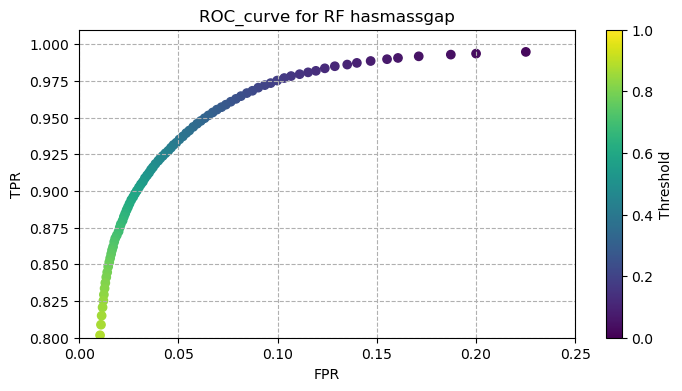

In [23]:
has_mass_gap_conf_matrix_rf = ROC_curve(combined_df,"rf")
fig, ax = plt.subplots(figsize=(8,4))
im1 = ax.scatter(has_mass_gap_conf_matrix_rf['FPR'],has_mass_gap_conf_matrix_rf['TPR'], c=has_mass_gap_conf_matrix_rf['Threshold'])
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_xlim(0.00,0.25)
ax.set_ylim(0.80,1.01)
cbar = fig.colorbar(im1)
cbar.set_label("Threshold")
ax.grid(linestyle = "--")
ax.set_title("ROC_curve for RF hasmassgap")

In [24]:
def run_tests_knn(features, targets,
                  num_runs=10,
                  test_size=0.1,
                  n_estimators=10,
                  max_features=None,
                  weights='distance',
                  n_jobs=-1,
                  verbose=True):
    '''
    Split the feature set into test and training, train
    and run classifier
    
    Parameters
    ----------
    features : numpy.ndarray
        Feature set, can be array or Dataframe
    targets : numpy.ndarray
        Binary target set, 0 or 1 values
    num_runs : int
        Number of test runs to be performed
    test_size : float
        Fraction of the feature set to be used for testing
    **kwargs
        Keyword arguments for classification algorithm
    '''
    avg = []
    for ii in range(num_runs):
        X_train, X_test, y_train, y_test = train_test_split(features, targets,
                                                            test_size=test_size,
                                                            random_state=np.random.randint(0,200))
        clf = KNeighborsClassifier(n_neighbors=n_estimators,
                                   n_jobs=n_jobs,
                                   weights=weights)
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        
        incorrect = np.logical_xor(predictions, y_test)
        correct = np.logical_not(incorrect)
        incorrect = np.sum(incorrect)
        correct = np.sum(correct)
        percentage_correct = 100.*(correct)/(correct+incorrect)
        percentage_incorrect = 100.*incorrect/(correct+incorrect)
        avg.append(percentage_incorrect)
        if verbose:
            print(
                "Correct predictions {}, incorrect predictions {}, correct {}%, incorrect {}%".format(
                    correct,
                    incorrect,
                    percentage_correct,
                    percentage_incorrect))
    with open("knn_balanced.pickle",'wb') as f:
        pickle.dump(clf, f)
    print("\nAverage Incorrectness: {}".format(np.mean(avg)))

In [25]:
def run_KNN_classifier(X_train, y_train,
                       X_test,
                       **kwargs):
    clf = KNeighborsClassifier(**kwargs)
    clf.fit(X_train, y_train)
    predictions_proba = clf.predict_proba(X_test)
    predict = clf.predict(X_test)
    return predictions_proba, predict


In [26]:
def run_k_fold_split(features, targets, n_splits=10, random_state=0,
                     **kwargs):

    res_predict_proba = np.empty(len(features))
    res_predict = np.empty(len(features))
    res_predict_proba[:] = np.nan
    res_predict[:] = np.nan

    sss = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    sss.get_n_splits(features, targets)
    for train_index, test_index in sss.split(features, targets):
        X_train, X_test, y_train = \
            features.iloc[train_index], \
            features.iloc[test_index], \
            targets.iloc[train_index]

        predict_proba, predict = run_KNN_classifier(X_train, y_train, X_test,
                                                    **kwargs)
        predict_proba = predict_proba.T[1]

        res_predict_proba[test_index] = predict_proba
        res_predict[test_index] = predict
    return res_predict, res_predict_proba


In [27]:

combined_df = pd.concat([df_massgap,df_nomassgap], ignore_index=True)
feature_cols = ["rec_m1", "rec_m2", "rec_spin1z","rec_spin2z","mc_rec","mtot_rec", "snr"]
category_cols = ["has_massgap"]
features = combined_df.loc[:,feature_cols]
category = combined_df.has_massgap



In [28]:
num_runs = 10
test_size = 0.10
n_estimators = 11
weights= 'distance'

In [29]:
run_tests_knn(features, category, n_estimators=n_estimators, weights=weights)

Correct predictions 10498, incorrect predictions 865, correct 92.38757370412743%, incorrect 7.612426295872569%
Correct predictions 10527, incorrect predictions 836, correct 92.64278799612778%, incorrect 7.357212003872217%
Correct predictions 10513, incorrect predictions 850, correct 92.5195810965414%, incorrect 7.4804189034585935%
Correct predictions 10525, incorrect predictions 838, correct 92.62518701047259%, incorrect 7.374812989527413%
Correct predictions 10540, incorrect predictions 823, correct 92.75719440288657%, incorrect 7.242805597113438%
Correct predictions 10552, incorrect predictions 811, correct 92.86280031681774%, incorrect 7.137199683182258%
Correct predictions 10538, incorrect predictions 825, correct 92.73959341723136%, incorrect 7.260406582768635%
Correct predictions 10544, incorrect predictions 819, correct 92.79239637419695%, incorrect 7.207603625803045%
Correct predictions 10577, incorrect predictions 786, correct 93.0828126375077%, incorrect 6.9171873624922995%
C

In [31]:
res_predict_knn, res_predict_proba_knn = run_k_fold_split(features, category, n_neighbors=n_estimators)

In [32]:
combined_df['knn_prob'] = res_predict_proba_knn

In [33]:
 def ROC_curve(df, method):
    conf_matrix = pd.DataFrame(columns=['TN','FN','FP','TP'])
    for i in np.arange(0.00,1.01,0.01): 
        df[method+"_threshold"] = np.where(df[method+"_"+"prob"]>= i, 1.0, df[method+"_"+"prob"])
        df[method+"_threshold"] = np.where(df[method+"_threshold"]!=1.0, 0.0, df[method+"_threshold"])
        FOMs = {0+0j:'TN', 1+0j:'FN',0+1j:'FP',1+1j:'TP'}
        winner_complex = df["has_massgap"] + 1j * df[method+"_threshold"]
        df["classified"] = winner_complex
        FOM_map = map (lambda x: FOMs[x], winner_complex) 
        df["classified"] = list(FOM_map)
        conf_matrix= conf_matrix.append(df["classified"].value_counts())
    conf_matrix = conf_matrix.reset_index(drop=True)
    conf_matrix = conf_matrix.fillna(0).astype(int)   
    conf_matrix['TPR'] = conf_matrix['TP']/(conf_matrix['TP']+conf_matrix['FN'])
    conf_matrix['TNR'] = conf_matrix['TN']/(conf_matrix['TN']+conf_matrix['FP'])
    conf_matrix['FNR'] = conf_matrix['FN']/(conf_matrix['FN']+conf_matrix['TP'])
    conf_matrix['FPR'] = conf_matrix['FP']/(conf_matrix['FP']+conf_matrix['TN'])
    conf_matrix['Threshold'] = np.arange(0.00,1.01,0.01)
    return conf_matrix

Text(0.5, 1.0, 'ROC_curve for knn hasmassgap')

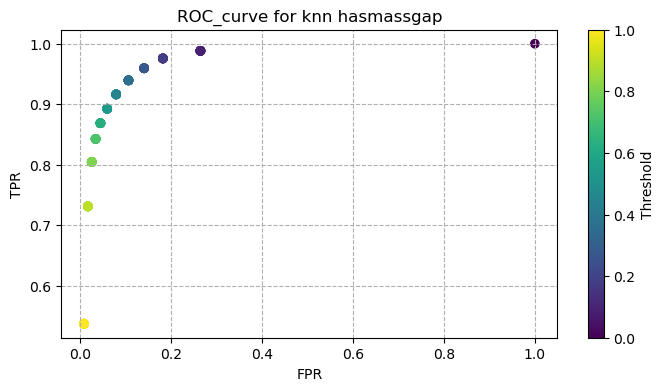

In [35]:
has_mass_gap_conf_matrix_rf = ROC_curve(combined_df,"knn")
fig, ax = plt.subplots(figsize=(8,4))
im1 = ax.scatter(has_mass_gap_conf_matrix_rf['FPR'],has_mass_gap_conf_matrix_rf['TPR'], c=has_mass_gap_conf_matrix_rf['Threshold'])
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
#ax.set_xlim(0.00,0.25)
#ax.set_ylim(0.80,1.01)
cbar = fig.colorbar(im1)
cbar.set_label("Threshold")
ax.grid(linestyle = "--")
ax.set_title("ROC_curve for knn hasmassgap")